In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

D:\anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("bank-additional-full.csv",delimiter=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df.shape

(41188, 21)

In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

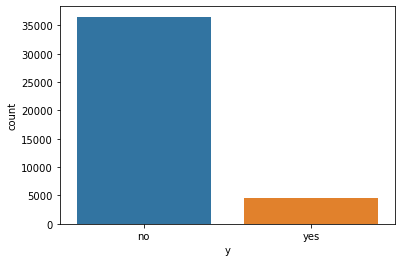

In [6]:
sns.countplot(x="y", data=df)

# From the above graph we can clearly say that data is imbalenced

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Renaming the index

In [8]:
df.rename(columns = {'y' : 'Target'}, inplace = True)

In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [12]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Target
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier

# Splitting the data into train test 

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
x = df.drop("Target", axis=1)
y = df["Target"]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 5)

In [19]:
x_train.shape

(30891, 20)

In [20]:
x_test.shape

(10297, 20)

In [21]:
df.shape

(41188, 21)

In [22]:
model = RandomForestClassifier(n_estimators=10, criterion = "gini")
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
pred = model.predict(x_test)

In [26]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [27]:
model.score(x_train, y_train)

0.993849341232074

In [28]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix(y_test, pred)

array([[8787,  288],
       [ 690,  532]], dtype=int64)

In [31]:
from sklearn.metrics import plot_confusion_matrix

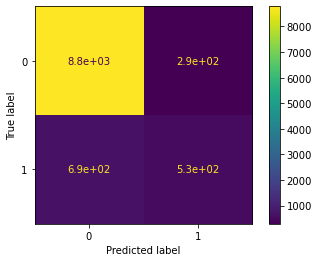

In [39]:
plot_confusion_matrix(model, x_test, y_test,cmap='viridis', values_format=None)